<h1>Figure 6</h1>
<p>This notebook analyses data generated with the luciferase reporter data described in the main manuscript.</p>
<p>Data are prepared by calculating F/R ratios, normalising against control condition, then re-normalising against control RLuc plasmid. ANOVAs are then conducted for the two series of data to establish statistical significance.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%run _Scripts/lucs.py
%run _Scripts/balance_anova.py

# Temperature data

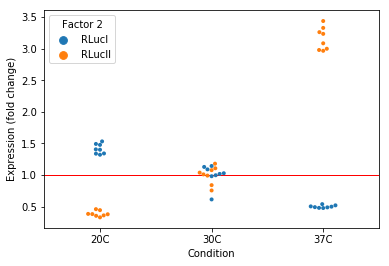

In [2]:
luc_data = prep_luc('_Data/An_160324_Temp.csv',controls=['30C','RLucC'])
t=sns.swarmplot(x='Factor 1', y='norm2', data = luc_data, hue = 'Factor 2', order=['20C','30C','37C'],size=4)
t.set(xlabel='Condition',ylabel='Expression (fold change)')
plt.plot([-0.5,6.5],[1,1],color='red', linestyle='-', linewidth=1)
#plt.savefig('Temperature.svg')
plt.show()

In [3]:
#conduct statistical tests. "True" indicates that the null hypothesis was rejected at the given significance level
balance_anova(luc_data,control='30C')

  FlucI  0.05  0.01  0.001
0   20C  True  True   True
1   37C  True  True   True
  FlucII  0.05  0.01  0.001
0    20C  True  True   True
1    37C  True  True   True


<h2> Elongation and initiation control during stresses</h2>

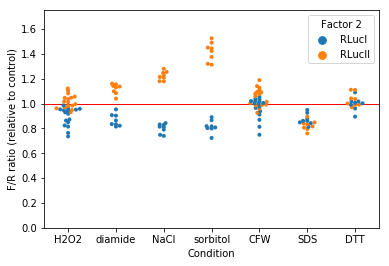

In [4]:
luc_data = prep_luc('_Data/An_160413_Stresses.csv','_Data/An_160415_Stresses.csv','_Data/An_160702_Stresses.csv',controls=['C','RLucC'])
#prepare plot
t=sns.swarmplot(x='Factor 1', y='norm2', data = luc_data, hue = 'Factor 2', order=['H2O2','diamide','NaCl','sorbitol','CFW','SDS','DTT'],size=4)
t.set(ylim=(0,1.75),xlabel='Condition',ylabel='F/R ratio (relative to control)')
plt.plot([-0.5,6.5],[1,1],color='red', linestyle='-', linewidth=1)
#plt.savefig('Stresses.svg')
plt.show()

In [5]:
#conduct statistical tests. "True" indicates that the null hypothesis was rejected at the given significance level
balance_anova(luc_data)

      FlucI   0.05   0.01  0.001
0       CFW  False  False  False
1       DTT  False  False  False
2      H2O2   True   True   True
3      NaCl   True   True   True
4       SDS   True   True   True
5   diamide   True   True   True
6  sorbitol   True   True   True
     FlucII   0.05   0.01  0.001
0       CFW  False  False  False
1       DTT  False  False  False
2      H2O2  False  False  False
3      NaCl   True   True   True
4       SDS   True   True   True
5   diamide   True   True   True
6  sorbitol   True   True   True
